### HANDWRITTEN ENGLISH CHARACTERS

### Importing reqiured library

In [1]:
!pip install opencv-python

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import glob as glob
import os
import cv2
import seaborn as sb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# SEED VALUE TO MAKE THE CLASSIFICATION DETERMINISTIC
SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

### Loading data set + Pre-processing

In [3]:
data = pd.read_csv(
    "Dataset/english.csv",
    dtype={"image": pd.StringDtype(), "label": pd.CategoricalDtype()}
)

In [4]:
print(data)

      Img/img001-001.png  0
0     Img/img001-002.png  0
1     Img/img001-003.png  0
2     Img/img001-004.png  0
3     Img/img001-005.png  0
4     Img/img001-006.png  0
...                  ... ..
3404  Img/img062-051.png  z
3405  Img/img062-052.png  z
3406  Img/img062-053.png  z
3407  Img/img062-054.png  z
3408  Img/img062-055.png  z

[3409 rows x 2 columns]


In [5]:
label_path = "Dataset/english.csv"

labels = []
filenames = []

with open(label_path, 'r') as File:
    infoFile = File.readlines() #Reading all the lines from File
    for line in infoFile: #Reading line-by-line
        words = line.split(",") #Splitting lines in words using space character as separator
        file = "Dataset/" + words[0].strip()
        filenames.append(file)
        labels.append(words[1].strip())
#print(filenames)

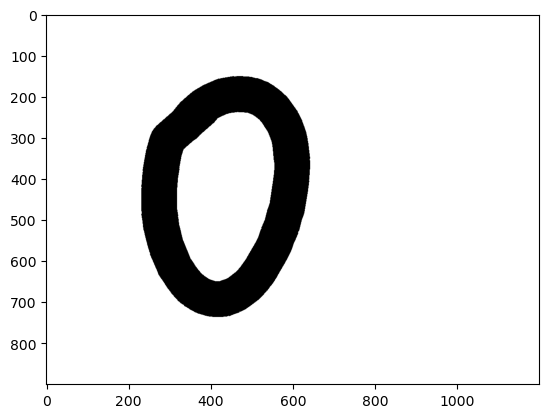

In [6]:
"""totalNumbers = len(filenames)
labelsNumbers = len(labels)
print(totalNumbers, labelsNumbers)"""
image = plt.imread(filenames[0])
plt.imshow(image)

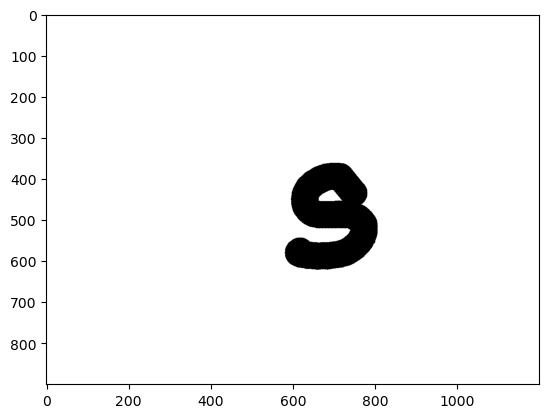

In [7]:
image = plt.imread(filenames[3000])
plt.imshow(image)

In [8]:
images = []
for i in filenames:
    img = cv2.imread(i, 1)
    #print(img.shape)
    img = cv2.resize(img, (64, 64))
    #print(img.shape)
    images.append(img)

In [9]:
images = np.array(images)
labels = np.array(labels)
print(images[0].shape)

Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

print(labels.shape)
print(labels)

(64, 64, 3)
(3410,)
[ 0  0  0 ... 61 61 61]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=SEED_VALUE)

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
print(X_train.shape)
print(y_train.shape)

(2728, 64, 64, 3)
(2728, 62)


In [13]:
print(X_test.shape)
print(y_test.shape)

(682, 64, 64, 3)
(682, 62)


### Model Building

In [14]:
model = Sequential()

#FIRST CONVOLUTION LAYER
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape = (64,64,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#SECOND LAYER
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#THIRD LAYER
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# CLASSIFICATION LAYER
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.50))
model.add(Dense(62, activation="softmax"))

In [15]:
model.compile(
    optimizer="rmsprop",
    loss = "categorical_crossentropy",
    metrics=["accuracy"],
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                   

In [17]:
history = model.fit(
    X_train,
    y_train,
    epochs = 30,
    validation_split = 0.2,
)

Epoch 1/30
69/69 [==============================] - 96s 1s/step - loss: 4.1341 - accuracy: 0.0115 - val_loss: 4.1264 - val_accuracy: 0.0238
Epoch 2/30
69/69 [==============================] - 124s 2s/step - loss: 3.8513 - accuracy: 0.0775 - val_loss: 3.4147 - val_accuracy: 0.1575
Epoch 3/30
69/69 [==============================] - 96s 1s/step - loss: 2.7804 - accuracy: 0.2814 - val_loss: 2.0696 - val_accuracy: 0.4634
Epoch 4/30
69/69 [==============================] - 100s 1s/step - loss: 1.9395 - accuracy: 0.4661 - val_loss: 1.8190 - val_accuracy: 0.5201
Epoch 5/30
69/69 [==============================] - 106s 2s/step - loss: 1.4506 - accuracy: 0.5857 - val_loss: 1.8500 - val_accuracy: 0.5110
Epoch 6/30
69/69 [==============================] - 109s 2s/step - loss: 1.1197 - accuracy: 0.6696 - val_loss: 1.3281 - val_accuracy: 0.6593
Epoch 7/30
69/69 [==============================] - 110s 2s/step - loss: 0.9101 - accuracy: 0.7314 - val_loss: 1.1937 - val_accuracy: 0.6722
Epoch 8/30
69/6

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_acc)

22/22 [==============================] - 3s 133ms/step - loss: 1.4267 - accuracy: 0.7581
Test Accuracy: 0.7580645084381104


In [19]:

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = np.argmax(y_test, axis=1)


22/22 [==============================] - 4s 137ms/step


In [20]:
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
print("Accuracy: ", accuracy)
print("Precision: ", precision)

Accuracy:  0.7580645161290323
Precision:  0.7807395022894419


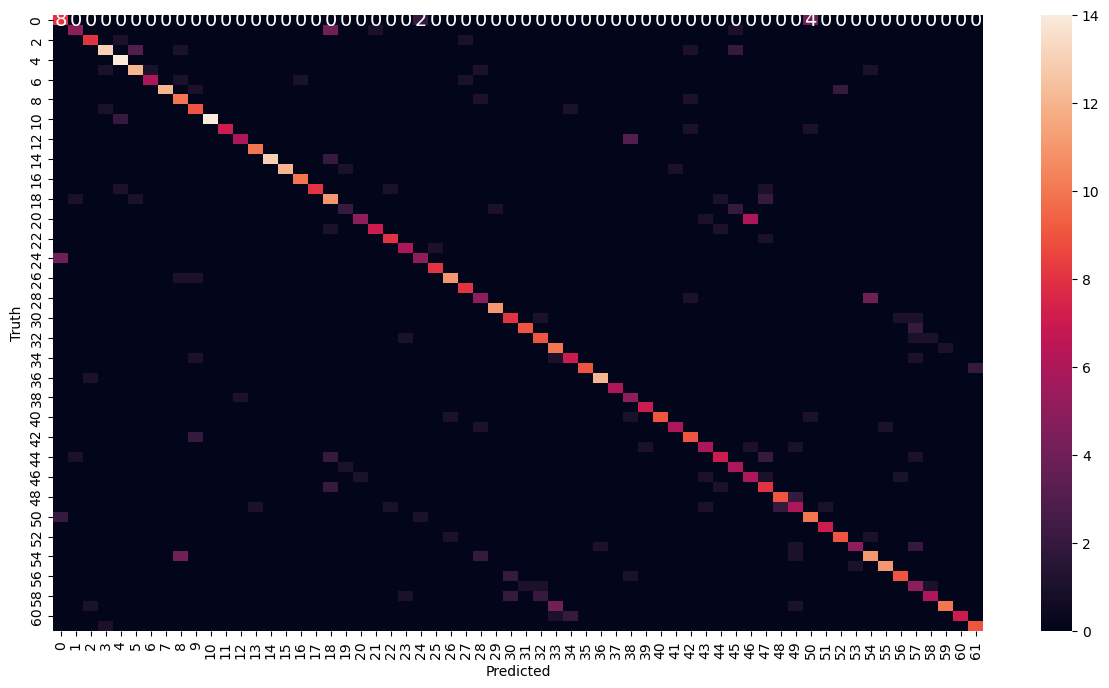

In [21]:
# PLOTTING CONFUSION MATRIX

cm = tf.math.confusion_matrix(labels=y_true_labels, predictions=y_pred_labels)

plt.figure(figsize=[15, 8])
sb.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

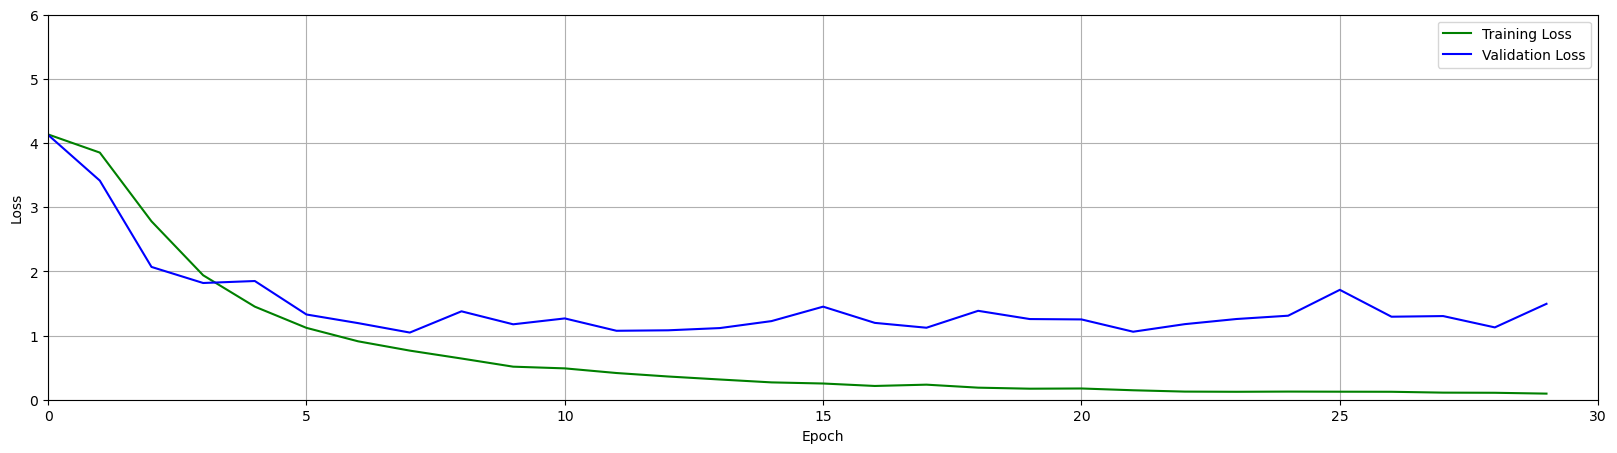

In [22]:
plt.figure(figsize=(20,5))
plt.plot(history.history['loss'], 'g', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.xlim([0, 30])
plt.ylim([0, 6])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

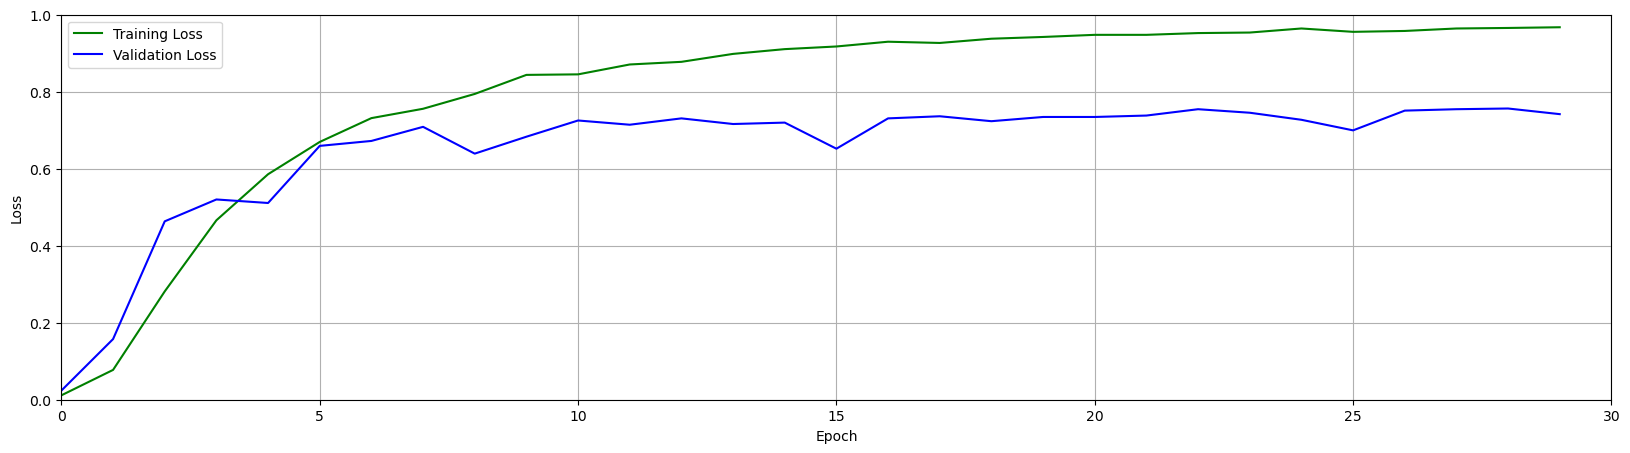

In [23]:
plt.figure(figsize=(20,5))
plt.plot(history.history['accuracy'], 'g', label='Training Loss')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Loss')
plt.xlim([0, 30])
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

1/1 [==============================] - 0s 129ms/step


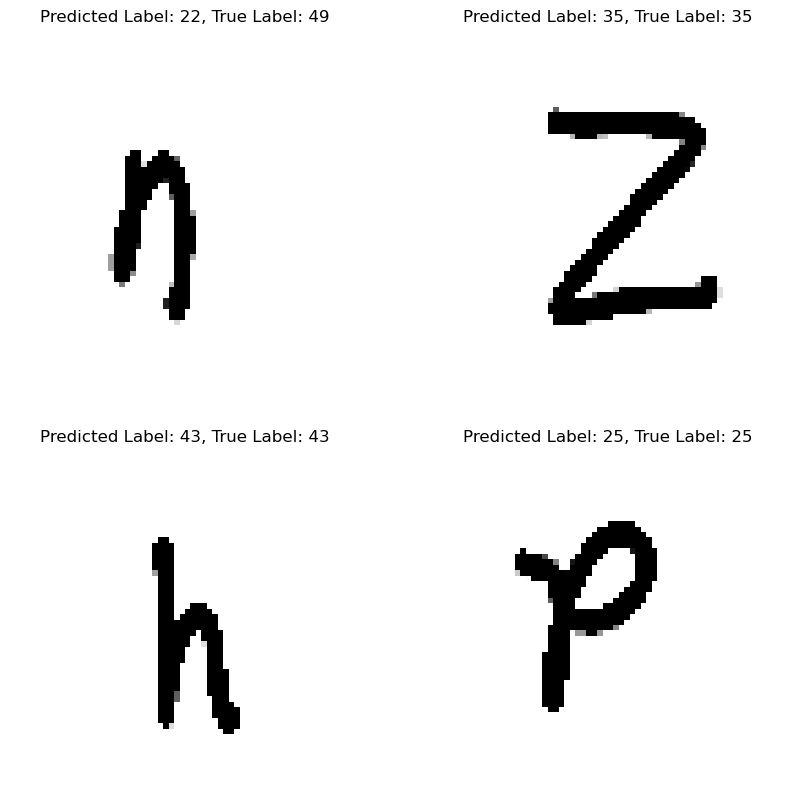

In [24]:
randomIndex = random.sample(range(len(X_test)), 4)
randomPred = model.predict(X_test[randomIndex])
yRandomPredLabel = np.argmax(randomPred, axis=1)
actualLabels = np.argmax(y_test[randomIndex], axis=1)

plt.figure(figsize=(10,10))
for i, x in enumerate(randomIndex):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[x])
    plt.title(f'Predicted Label: {yRandomPredLabel[i]}, True Label: {actualLabels[i]}')
    plt.axis('off')
plt.show()

### Function to convert label to char

In [25]:

maps = {
    0 : '0', 1 : '1', 2 : '2', 3 : '3', 4 : '4', 5 : '5', 6 : '6', 7 : '7', 8 : '8', 9 : '9',
}
ordval = 65
for i in range(10, 36):
    maps[i] = chr(ordval)
    ordval += 1

ordval = 97
for i in range(36, 62):
    maps[i] = chr(ordval)
    ordval += 1



In [26]:
def convertLabelToChar(x):
    return maps[x]

## RE-PLOTTING IMAGES

1/1 [==============================] - 0s 77ms/step


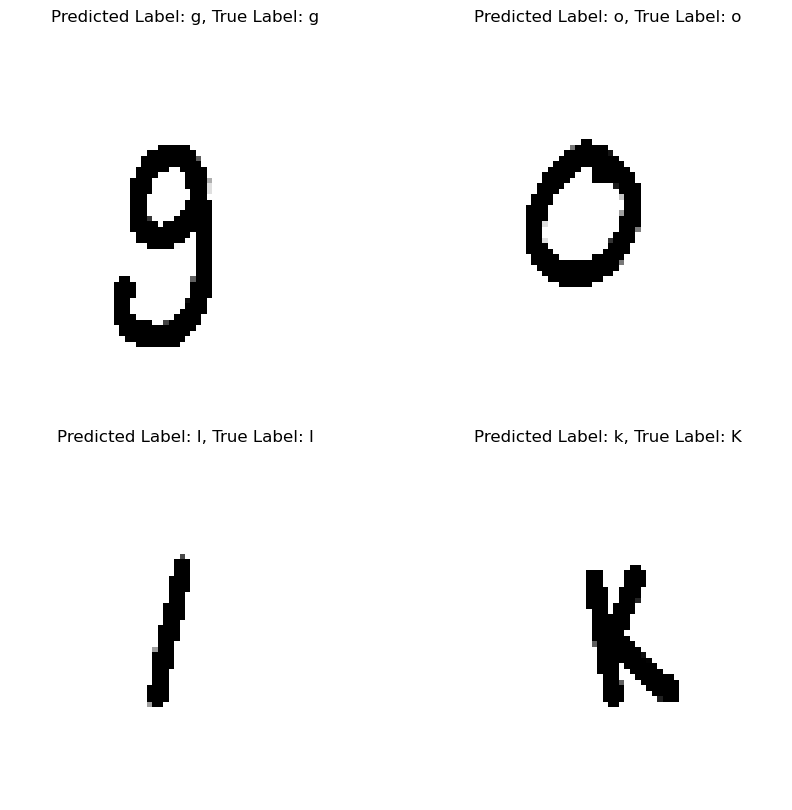

In [27]:
randomIndex = random.sample(range(len(X_test)), 4)
randomPred = model.predict(X_test[randomIndex])
yRandomPredLabel = np.argmax(randomPred, axis=1)
actualLabels = np.argmax(y_test[randomIndex], axis=1)

plt.figure(figsize=(10,10))
for i, x in enumerate(randomIndex):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[x])
    plt.title(f'Predicted Label: {convertLabelToChar(yRandomPredLabel[i])}, True Label: {convertLabelToChar(actualLabels[i])}')
    plt.axis('off')
plt.show()